<a href="https://colab.research.google.com/github/mdabushad/Hotel-Booking-Analysis-EDA-Capstone/blob/main/data_machines_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## Data collection and data cleaning:

### Import required libraries

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

### Loading dataset file and using pd.read_csv() to read file

In [16]:
url = 'https://drive.google.com/file/d/1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

#### Retrieve first few rows of dataframe using pandas 'head' method.

In [17]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Use pandas info() method that prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

#### We can see that shape of dataframe is (11930,32)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

###Check if any missing value(NULL,NaN,NA) is present for any column using  isna() function.

#### We can see data is missing for country, agent, comapany.


In [19]:
df.isna().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### As missing values are very large for 'agent' and 'company' we will delete both columns using drop() method and for 'country' as missing values are very less we will drop missing values using dropna() method.

#### Print updated dataframe to check if all missing values are 0.

In [20]:
df= df.drop(columns=['agent', 'company'])

df = df.dropna()

print(df.isna().sum(axis=0))


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#### Generate descriptive statistics using decribe() method, descriptive statistics summarize the mean, percentiles, standard deviation, max and min values excluding NaN values.

In [21]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


## Exploratory Data Analysis

## 1) Hotel Type

#### Use value_count() method to overview of hotel type where customers are staying.

#### We can see that around 66% customers booked 'City Hotel' and 33% booked 'Resort Hotel'.

In [22]:
df['hotel'].value_counts(normalize = True)

City Hotel      0.666975
Resort Hotel    0.333025
Name: hotel, dtype: float64

### Visualizing Hotel Type using countplot.

#### As we can see from the plot below, people are more interested in staying at city hotels instead of resort hotels, and there are approximately 50% fewer bookings at resort hotels as compared to city hotels.


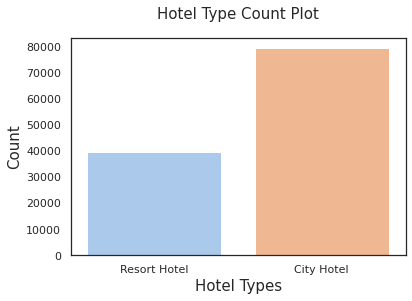

In [23]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

g = sns.countplot(x='hotel',data=df)

g.set_xlabel('Hotel Types',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('Hotel Type Count Plot', fontsize = 15, y = 1.06)

plt.show()

## 2) Canceled Booking

#### Use value_count() method to overview of hotel cancellations

#### We can see that around 37% customers canceled their booking.

In [24]:
df['is_canceled'].value_counts(normalize = True)

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64

### Visualizing Cancelation using countplot.

####As we can see from the count plot below that majority of the bookings were not cancelled, but still there is little amount of bookings cancelled.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


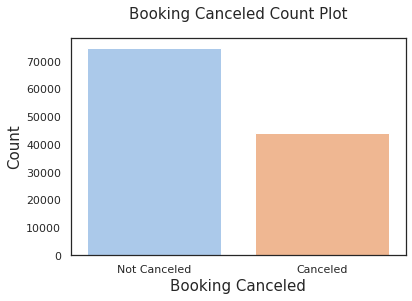

In [25]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

df['is_canceled'] = df.is_canceled.replace([1,0], ['Canceled', 'Not Canceled'])
booking_canceled_data = df['is_canceled']
g = sns.countplot(booking_canceled_data)

g.set_xlabel('Booking Canceled',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('Booking Canceled Count Plot', fontsize = 15, y = 1.06)

plt.show()

# 4) Arrival Date Month

#### Use value_count() method to overview of customer arrival by Month.

#### We can see that around 11% customers preffered August and only 4% customers preffered January.

In [26]:
df['arrival_date_month'].value_counts(normalize = True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

### Visualizing Arrival Date Month using countplot.
 
### As we can see from below plot which months are the most popular among guests visiting hotels. Highest bookings recorded in months August, July, May and October. Least bookings recorded in January, December and November.

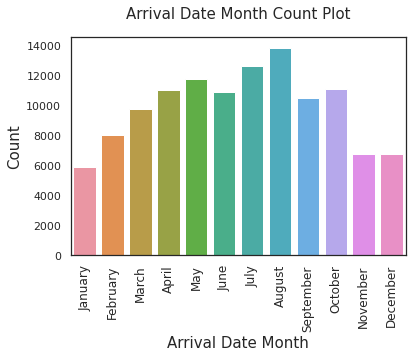

In [27]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('husl')

g = sns.countplot(x='arrival_date_month',data=df, order=["January","February","March","April","May","June","July","August","September","October","November","December"])

g.set_xlabel('Arrival Date Month',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('Arrival Date Month Count Plot', fontsize = 15, y = 1.06)

plt.xticks(rotation = 90, fontsize = 12)
plt.show()

# 4) Country

#### Use value_count() method to overview of customer arrival by Country.

#### We can see that around 41% of customers from Portugal, 10% from Great Britain and 8% from France.

In [28]:
df['country'].value_counts(normalize = True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

### Visualizing Country of customer arrival using countplot.
 
### As we can see from below plot that Most Customers are from Portugal, Great Britain, France and Spain.

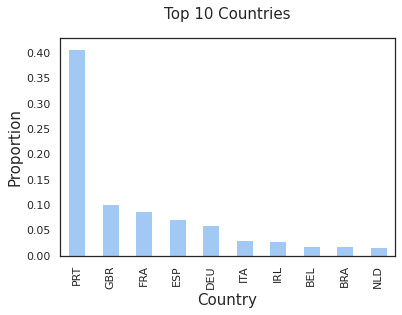

In [29]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')
 
df['country'].value_counts(normalize = True)[0:10].plot(kind = 'bar')

plt.xlabel('Country',fontsize = 15)
plt.ylabel('Proportion',fontsize = 15)
plt.title('Top 10 Countries', fontsize = 15, y = 1.06)

plt.show()
